In [40]:
import pandas as pd
import h5py

seg_path = '/home/ron/Documents/DenseSeg/dataset/data/graz/graz_img_seg_lms.h5'
csv_path = '/home/ron/Documents/DenseSeg/dataset/data/graz/dataset_with_cv_split.csv'

df_meta = pd.read_csv(csv_path)
storage = h5py.File(seg_path, 'r')
available_files = list(storage.keys())

print(f'Number of files in csv: {len(df_meta)}', 'Values of split column:', df_meta['cv_test_idx'].unique())
df_meta = df_meta[df_meta['filestem'].isin(available_files)]
print(f'Number of files in csv after filtering: {len(df_meta)}', 'Values of split column:', df_meta['cv_test_idx'].unique())

Number of files in csv: 20327 Values of split column: [ 0  2 -1  1]
Number of files in csv after filtering: 569 Values of split column: [-1  1  2  0]


In [41]:
df_meta['cv_test_idx'].value_counts()

cv_test_idx
 2    202
 0    158
 1    151
-1     58
Name: count, dtype: int64

In [42]:
df_meta['age'] = df_meta['age'] * 12

df_train = df_meta[(df_meta['cv_test_idx'] == 0) | (df_meta['cv_test_idx'] == 2)]
df_test = df_meta[(df_meta['cv_test_idx'] == -1) | (df_meta['cv_test_idx'] == 1)]

print(f'Train: {len(df_train)}', f'Test: {len(df_test)}')

Train: 360 Test: 209


Text(0, 0.5, 'Age (months)')

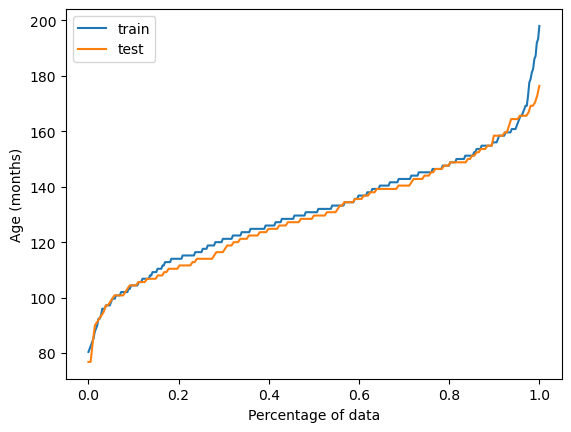

In [43]:
from matplotlib import pyplot as plt
import numpy as np

age_train = df_train['age'].values
age_test = df_test['age'].values

plt.plot(np.linspace(0, 1, len(age_train)), sorted(age_train), label='train')
plt.plot(np.linspace(0, 1, len(age_test)), sorted(age_test), label='test')
plt.legend()
plt.xlabel('Percentage of data')
plt.ylabel('Age (months)')

In [51]:
import torch

lm = [torch.tensor(storage[f]['lms']) for f in df_train['filestem']]
lm = torch.stack(lm)

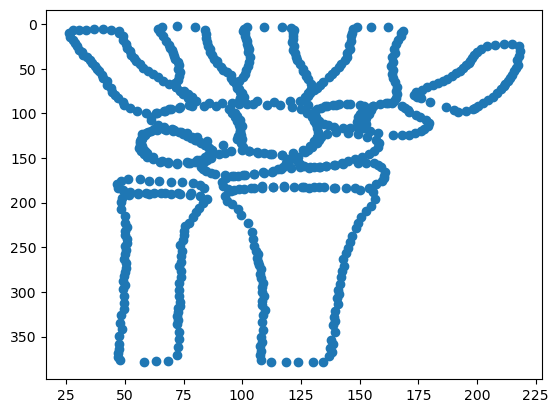

In [52]:

mean_shape = lm.mean(dim=0)

plt.scatter(mean_shape[:, 1], mean_shape[:, 0])
plt.gca().invert_yaxis()